# Explainable CNN

https://github.com/ashutosh1919/explainable-cnn

https://github.com/ashutosh1919/explainable-cnn/blob/main/examples/explainable_cnn_usage.ipynb

layer-wise network visualization

## Installing the package

To use the visualization module, we have created python pip package called `explainable-cnn` which you can install in your system using below command

In [1]:
! pip install explainable-cnn

# Import and Usage

Currently, `explainable-cnn` contains only single usable class which you may want to use: `CNNExplainer`. This class consists of multiple methods to visualize GradCAM, Guided GradCAM, Guided Backpropagation and Saliency maps.f

In [2]:
from explainable_cnn import CNNExplainer
import pickle, torch
from torchvision import models
import matplotlib.pyplot as plt

from PIL import Image

We are using [ImageNet](https://www.image-net.org/) dataset for examples and that is why we also need the labels which are used for training the model. We are also taking pre-trained [`ResNet18`](https://pytorch.org/hub/pytorch_vision_resnet/) model from PyTorch.

In [3]:
with open("./data/imagenet_class_labels.pkl", "rb") as label_file:
    imagenet_class_labels = pickle.load(label_file)
imagenet_class_labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [4]:
model = models.vgg16(pretrained=True)

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Created instance of `CNNExplainer` which takes model and class label pair(`dict`) as input.

In [6]:
x_cnn = CNNExplainer(model, imagenet_class_labels)

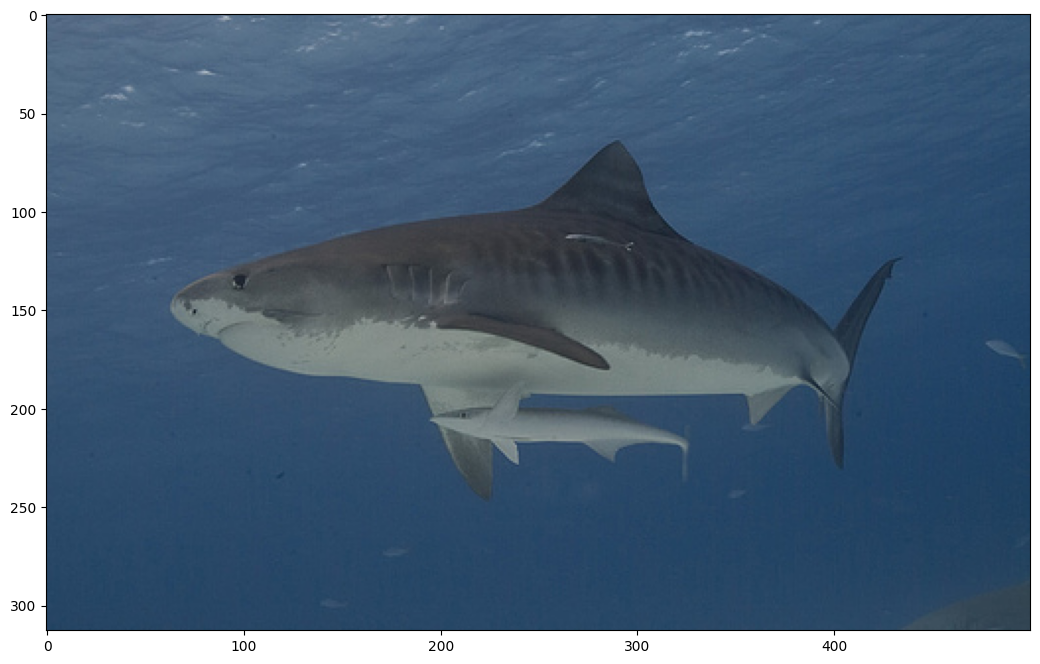

tiger shark, Galeocerdo cuvieri
500 313


In [7]:
## load a sample image

image = Image.open('./data/tiger_shark.jpeg').convert('RGB')

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

print(imagenet_class_labels[3])

w, h = image.size
print(w,h)

### Saliency Maps

[Saliency Maps](https://en.wikipedia.org/wiki/Saliency_map#:~:text=In%20computer%20vision%2C%20a%20saliency,to%20the%20human%20visual%20system.) will create heatmap which denotes the area of image where human eye focuses first. Note that the package supports generating saliency map for a model and not layer-wise. You can use `get_saliency_map()` function to get the numpy drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L289-L305).

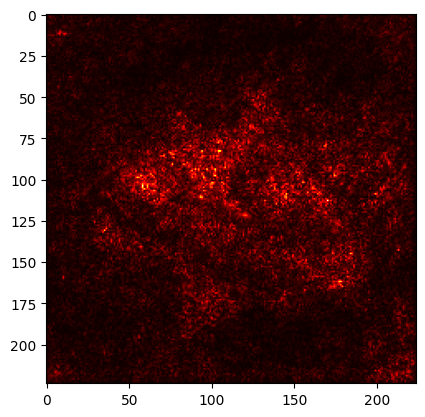

In [10]:
saliency_map = x_cnn.get_saliency_map(
    './data/tiger_shark.jpeg',
    "tiger shark, Galeocerdo cuvieri", # Label corresponding to Shark. You can pass either 3 or "tiger shark, Galeocerdo cuvieri",
    (224, 224)
)

plt.imshow(saliency_map, cmap="hot")

### Guided Backpropagation

[Guided Backpropagation](https://medium.com/@chinesh4/generalized-way-of-interpreting-cnns-a7d1b0178709) is similar technique which combines Vanilla Backpropagation and Deconvolution. Similar to Saliency maps, guided backpropagation supports only for entirely for model and not layer-wise. You can use `get_guided_back_propagation()` to get drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L246-L261).

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


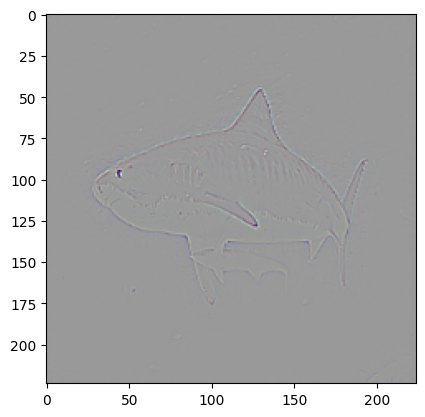

In [11]:
guided_backprop = x_cnn.get_guided_back_propagation(
    "./data/tiger_shark.jpeg",
    3,
    (224,224)
)

plt.imshow(guided_backprop.astype('uint8'))

### Grad CAM

[Grad CAM](https://arxiv.org/abs/1610.02391) is more sophisticated technique to draw visualization based on class confidence over an image. Unlike above two, Grad CAM supports layer-wise image extraction in this package. You can use `get_grad_cam()` to get drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L131-L148).

In [15]:
grad_cam = x_cnn.get_grad_cam(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224),
    ["features"]  # List of layer names for which you want to generate image.
)

# Note that get_grad_cam() returns list of images (numpy array)
plt.imshow(grad_cam[0].astype('uint8'))

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Guided Grad CAM

[Guided Grad CAM](https://medium.com/@mohamedchetoui/grad-cam-gradient-weighted-class-activation-mapping-ffd72742243a) is a gradient-weighted class activation mapping which combines Guided Backpropagation and Grad CAM functionality. Similar to Grad CAM, Guided Grad CAM supports layer-wise image extraction in this package. You can use `get_guided_grad_cam()` to get drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L187-L203).

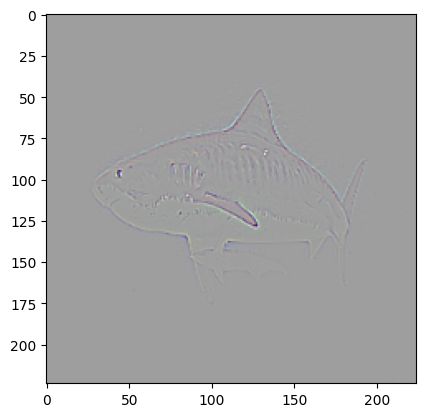

In [16]:
model
guided_grad_cam = x_cnn.get_guided_grad_cam(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224),
    ["features"]
)

plt.imshow(guided_grad_cam[0].astype('uint8'))

## Layerwise Comparison

One can easily draw layerwise comparison of Grad CAM and Guided Grad CAM plots to easily understand the working of CNN model. Below, we have given such example. We have defined the layers for which we will generate images.

In [ ]:
model = models.resnet50(pretrained=True)
model

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/jeong-wonseok/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
 54%|████████████████████▌                 | 52.9M/97.8M [00:11<00:09, 5.10MB/s]

In [ ]:
x_cnn = CNNExplainer(model, imagenet_class_labels)